In [297]:
# PROJECT OVERVIEW

# Deliverables:

# Import your data into a Pandas DataFrame.
# Merge your DataFrames.
# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# Determine the mean, median, and mode for the following:
    # The total number of rides for each city type.
    # The average fares for each city type.
    # The total number of drivers for each city type.
# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
    # The number of rides for each city type.
    # The fares for each city type.
    # The number of drivers for each city type.
# Create a pie chart that visualizes each of the following data for each city type:
    # The percent of total fares.
    # The percent of total rides.
    # The percent of total drivers.

In [298]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [299]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [300]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [301]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [302]:
# INSPECT CITY DATA DATAFRAME
# Get the row count.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [303]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [304]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [305]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [306]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [307]:
# Get the number of data points from the Suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [308]:
# Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [309]:
# INSPECT RIDE DATA DATAFRAME
# Get the row count
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [310]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [311]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [312]:
# MERGE THE DATAFRAMES ON THE "CITY" COLUMN
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [313]:
# Create Dataframes for each type of city
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [314]:
# Create a count for the number of rides in Urban, Suburban, and Rural cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [315]:
# Get the average fare for each city in the different city types
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [316]:
# Get the average number of drivers for each city in the different city types
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [317]:
# Create a scatter plot for each type of city where the following conditions are met:

    # The x-axis is the number of rides for each city.
    # The y-axis is the average fare for each city.
    # The size of each marker is the average number of drivers in each city.

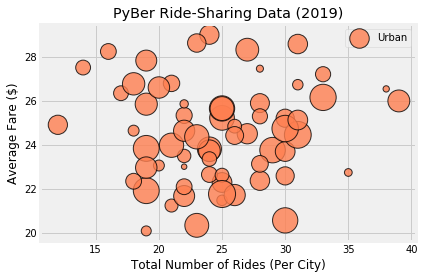

In [318]:
# Create the Urban Cities bubble chart

# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

# Add title and labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Add grid
plt.grid(True)

# Add the legend.
plt.legend()

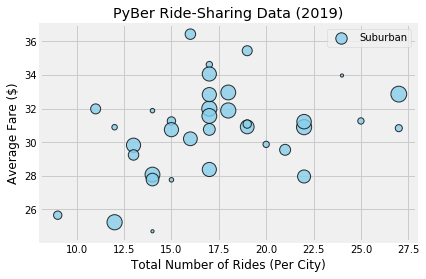

In [319]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

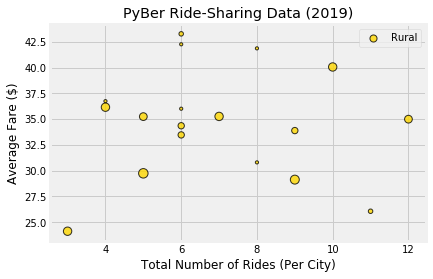

In [320]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

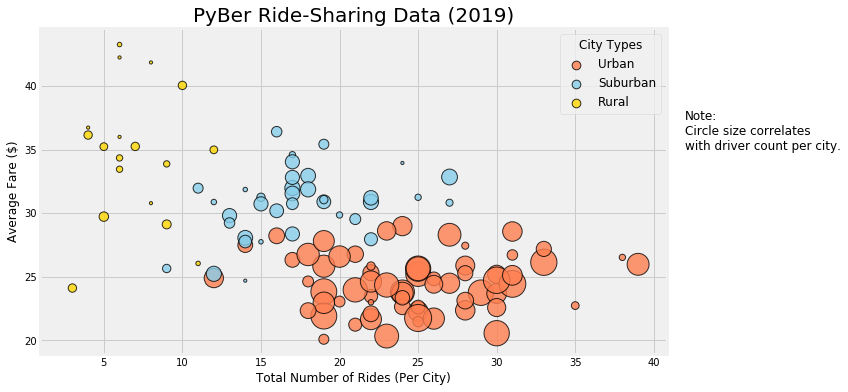

In [321]:
# MERGE THE THREE SCATTER PLOTS
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Fig1.png")

# Show the plot
plt.show()

In [322]:
# Get urban cities summary ststistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [323]:
# Get suburban cities summary ststistics
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [324]:
# Get rural cities summary ststistics
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [325]:
# Get urban cities ride count summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [326]:
# Get suburban cities ride count summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [327]:
# Get rural cities ride count summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [328]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [329]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [330]:
# Calculate the mode of the ride count for each type of city
print(urban_ride_count.mode())
print(suburban_ride_count.mode())
print(rural_ride_count.mode())

0    22
1    25
dtype: int64
0    17
dtype: int64
0    6
dtype: int64


In [331]:
# An optional approach to calculating the mean, median, and mode of a DataFrame or Series is to use the NumPy and 
# SciPy statistics modules. We introduce these methods because there might come a time when you’re working in the 
# Python interpreter or VS Code environment instead of the Jupyter Notebook environment.

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [332]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [333]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [334]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [335]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [336]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [337]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [338]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [339]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [340]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [341]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [342]:
# Calculate the measures of central tendency for the average driver count for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

The mean driver count for urban cities is 36.68.
The median driver count for urban cities is 37.00.
The mode driver count for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [343]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [344]:
# Calculate the measures of central tendency for the average driver count for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")

The mean driver count for suburban cities is 13.71.
The median driver count for suburban cities is 16.00.
The mode driver count for suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [345]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [346]:
# Calculate the measures of central tendency for the average driver count for the suburban cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_suburban_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")

The mean driver count for rural cities is 13.71.
The median driver count for rural cities is 4.00.
The mode driver count for rural cities is ModeResult(mode=array([1]), count=array([32])).


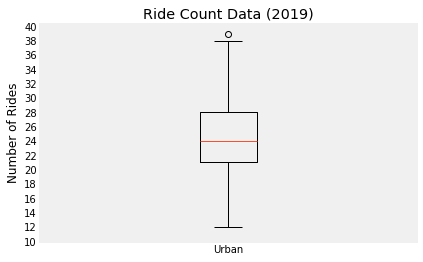

In [347]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

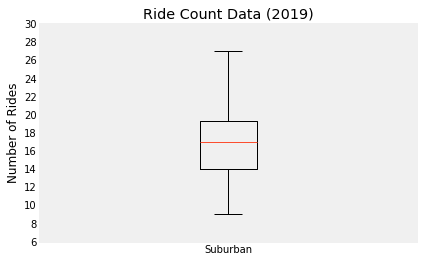

In [348]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(6, 31, step=2.0))
ax.grid()
plt.show()

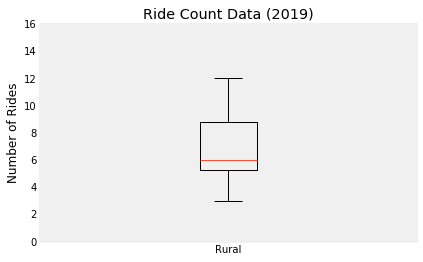

In [349]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 17, step=2.0))
ax.grid()
plt.show()

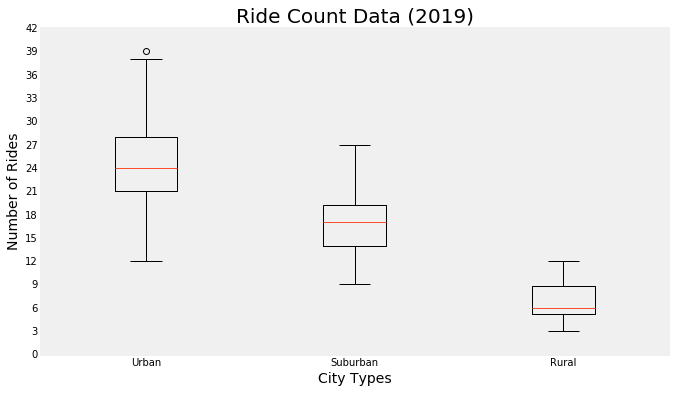

In [350]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [351]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


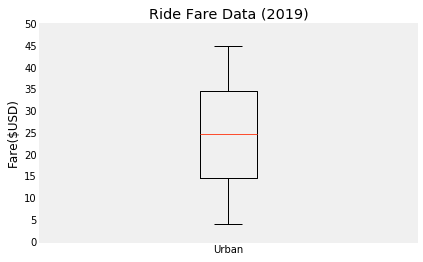

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [352]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

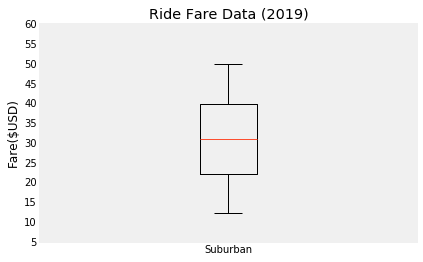

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [353]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 61, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

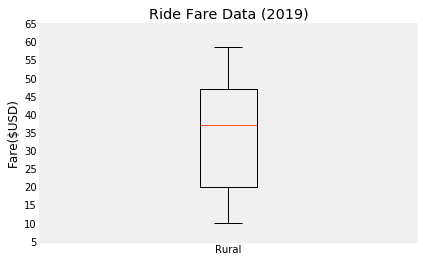

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [354]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 66, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

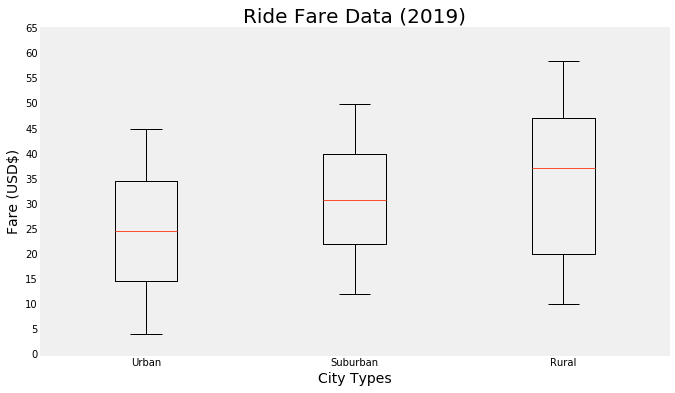

In [355]:
# Add all fare data box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare (USD$)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 66, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

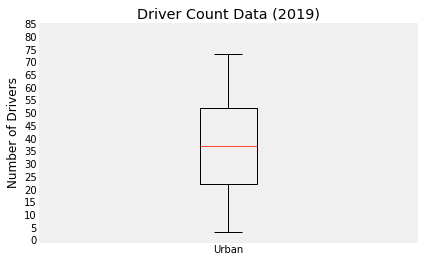

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [356]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

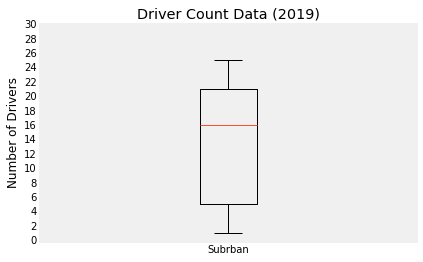

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [357]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 31, step=2.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

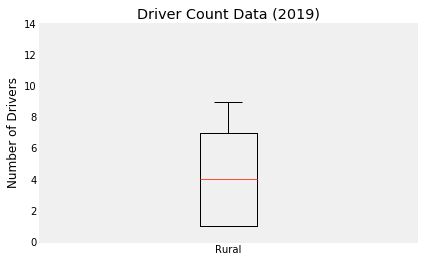

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [358]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 16, step=2.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

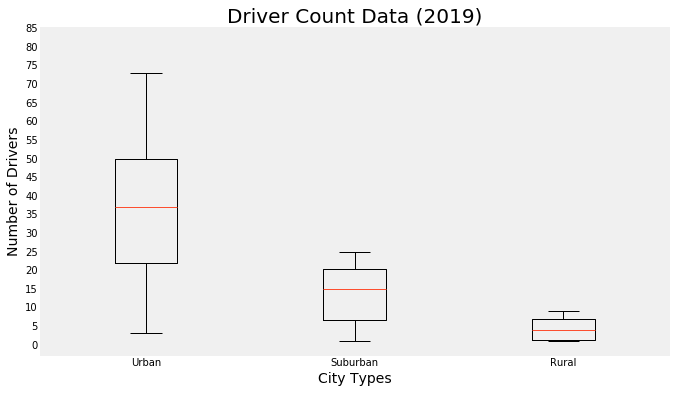

In [359]:
# Add all driver count data box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [360]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [361]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [362]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

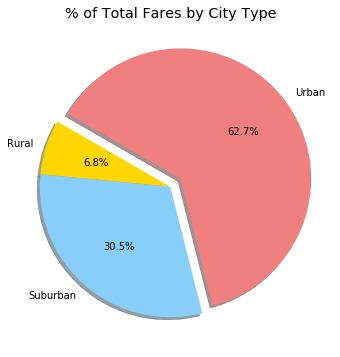

In [363]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()

In [364]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

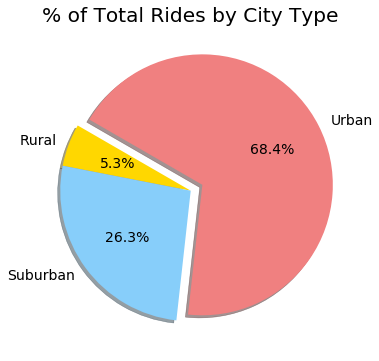

In [365]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig6.png")

# Show Figure
plt.show()

In [366]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

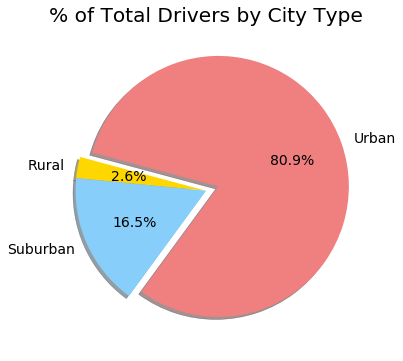

In [367]:
# Build percentage of drivers by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig7.png")

# Show Figure
plt.show()

In [368]:
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [ ]:
# CHALLENGE

In [369]:
# Get the ride total by city type
ride_total = pyber_data_df.groupby(["type"]).count()["ride_id"]

print(ride_total)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [370]:
# Get the driver total by city type
driver_total = city_data_df.groupby(["type"]).sum()["driver_count"]

print(driver_total)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


In [371]:
# Get the total fares by city type
fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]

print(fare_total)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [372]:
# Create the basic summary dataframe
basic_summary = [fare_total, driver_total, ride_total]
basic_summary_df = pd.DataFrame({"Total Rides":ride_total, "Total Drivers":driver_total, "Total Fares":fare_total})
basic_summary_df.head()

,Total Rides,Total Drivers,Total Fares
type,,,
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [373]:
# Calculate the average fare per ride and fare per driver (Urban)
urban_avg_fare_ride = basic_summary_df.loc['Urban', 'Total Fares'] / basic_summary_df.loc['Urban', 'Total Rides']
urban_avg_fare_driver = basic_summary_df.loc['Urban', 'Total Fares'] / basic_summary_df.loc['Urban', 'Total Drivers']

In [374]:
# Calculate the average fare per ride and fare per driver (Suburban)
suburban_avg_fare_ride = basic_summary_df.loc['Suburban', 'Total Fares'] / basic_summary_df.loc['Suburban', 'Total Rides']
suburban_avg_fare_driver = basic_summary_df.loc['Suburban', 'Total Fares'] / basic_summary_df.loc['Suburban', 'Total Drivers']

In [375]:
# Calculate the average fare per ride and fare per driver (Rural)
rural_avg_fare_ride = basic_summary_df.loc['Rural', 'Total Fares'] / basic_summary_df.loc['Rural', 'Total Rides']
rural_avg_fare_driver = basic_summary_df.loc['Rural', 'Total Fares'] / basic_summary_df.loc['Rural', 'Total Drivers']

In [386]:
# Create the summary dataframe
avg_fare_ride = [rural_avg_fare_ride, suburban_avg_fare_ride, urban_avg_fare_ride]
avg_fare_driver = [rural_avg_fare_driver, suburban_avg_fare_driver, urban_avg_fare_driver]
summary = [fare_total, driver_total, ride_total, avg_fare_ride, avg_fare_driver]
summary_df = pd.DataFrame({"Total Rides":ride_total, "Total Drivers":driver_total, "Total Fares":fare_total, 
                           "Average Fare per Ride":avg_fare_ride, "Average Fare per Driver":avg_fare_driver})

# Formatting
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)
summary_df = summary_df.rename_axis(None)

# Save as CSV
summary_df.to_csv("analysis/Pyber_Summary.csv")

summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [377]:
# Rename DataFrame columns 

pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare': 'Fare', 'ride_id': 'Ride Id', 
                              'driver_count': 'No. Drivers', 'type': 'City Type'}, inplace=True)
# Set index to Date
pyber_data_df.set_index("Date")

pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [378]:
# Create new dataframe containing Date, City Type and Fare
city_fare_df = pyber_data_df[['Date', 'City Type', 'Fare']].copy()

city_fare_df.head()

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58


In [379]:
# Set the index to the datetime data type
city_fare_df['Date'] = pd.to_datetime(city_fare_df['Date'])

# Set the Data Frame's index to 'Date'
city_fare_df.set_index('Date')

# Make sure the 'Date' column is of the "datetime" data type
city_fare_df.info("Date")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2375 non-null   datetime64[ns]
 1   City Type  2375 non-null   object        
 2   Fare       2375 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [380]:
# Calculate the sum of fares by the type of city and convert the Series into a DataFrame
city_fare_summary_df = pd.DataFrame(city_fare_df.groupby(["City Type"]).sum()["Fare"])

city_fare_summary_df.head()

,Fare
City Type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [381]:
# Reset the Index and create a pivot table DataFrame with the Date as the index and columns = 'City Type'

# Reset the Index
city_fare_df = city_fare_df.reset_index()

# Create a pivot table
city_fare_pt = pd.pivot_table(city_fare_df, values = "Fare", index = "Date", columns = "City Type")
print(city_fare_pt)

City Type            Rural  Suburban  Urban
Date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
...                    ...       ...    ...
2019-05-08 04:20:00    NaN       NaN  21.99
2019-05-08 04:39:49    NaN       NaN  18.45
2019-05-08 07:29:01    NaN       NaN  18.55
2019-05-08 11:38:35    NaN       NaN  19.77
2019-05-08 13:10:18    NaN       NaN  18.04

[2375 rows x 3 columns]


In [382]:
# Convert pivot table into a Data Frame
city_fare2_df = city_fare_pt.loc['2019-01-01':'2019-04-28']

city_fare2_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [383]:
# Create a new DataFrame by setting the city_fare2_df you created with resample() in weekly bins, 
# and calculate the sum() of the fares for each week in the resampled data

city_fare_weekly = pd.DataFrame()
city_fare_weekly = city_fare2_df.resample('W').sum()

print(city_fare_weekly)

City Type    Rural  Suburban    Urban
Date                                 
2019-01-06  187.92    721.60  1661.68
2019-01-13   67.65   1105.13  2050.43
2019-01-20  306.00   1218.20  1939.02
2019-01-27  179.69   1203.28  2129.51
2019-02-03  333.08   1042.79  2086.94
2019-02-10  115.80    974.34  2162.64
2019-02-17   95.82   1045.50  2235.07
2019-02-24  419.06   1412.74  2466.29
2019-03-03  175.14    858.46  2218.20
2019-03-10  303.94    925.27  2470.93
2019-03-17  163.39    906.20  2044.42
2019-03-24  189.76   1122.20  2368.37
2019-03-31  199.42   1045.06  1942.77
2019-04-07  501.24   1010.73  2356.70
2019-04-14  269.79    784.82  2390.72
2019-04-21  214.14   1149.27  2303.80
2019-04-28  191.85   1357.75  2238.29


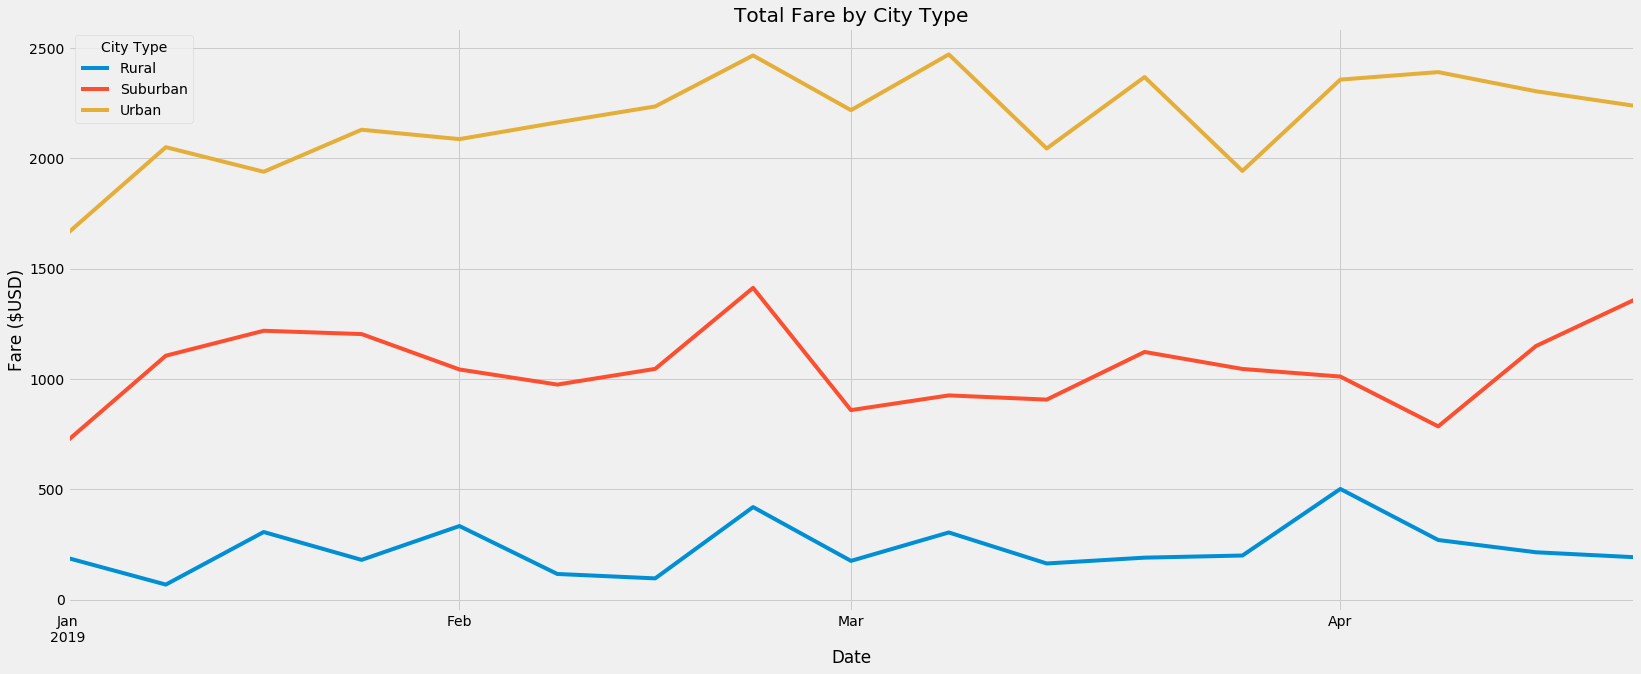

In [384]:
# Using the object-oriented interface method, plot city_fare_weekly in the FiveThirtyEight graph style.

plt.style.use('fivethirtyeight')

city_fare_weekly.plot(figsize = (25,10))

plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
ax.legend

plt.savefig("analysis/Fig8.png")

plt.show()
